## Import Libs

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd
import json

/home/adarshm26/envs/dwdm_assignment/lib/python3.8/site-packages/geopandas/_compat.py:84: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  warnings.warn(


### Import District Shapefile

In [2]:
india_districts = gpd.read_file('India_Districts_ADM2_GADM-shp/India_Districts_ADM2_GADM.shp')
india_districts.sample()

,FID,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,NL_NAME_2,VARNAME_2,TYPE_2,ENGTYPE_2,geometry
391,392,105,IND,India,14,Himachal Pradesh,168,Bilaspur,None,None,District,District,"POLYGON ((76.71505 31.58831, 76.71657 31.58512..."


<AxesSubplot:>

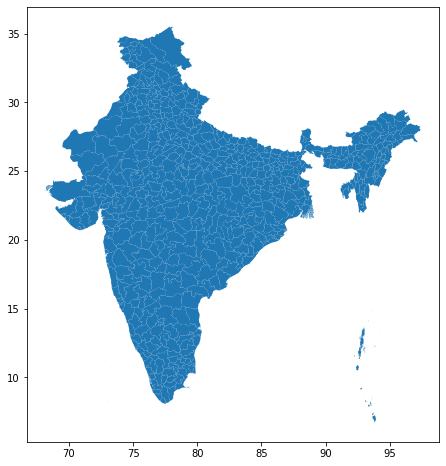

In [3]:
india_districts.plot(figsize = (8,8))

### Import CSV data of Pollutants (Source CPCB 2015 data)

In [4]:
from os import listdir

complete_aqi_file_list = [f for f in listdir('CPCB_Data') if '.csv' in f]
aqi_data_list = []
for file in complete_aqi_file_list:
    aqi_data_list.append(pd.read_csv('CPCB_Data/'+file, sep=',', header=0))
aqi_data = pd.concat(aqi_data_list)
aqi_data.index=list(range(len(aqi_data)))
aqi_data.sample()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5,Unnamed: 11
6712,583,06-08-15,Andhra Pradesh,Guntur,"Near Hindu College, Market Road, Guntur",Andhra Pradesh State Pollution Control Board,"Residential, Rural and other Areas",5.0,26.0,76.0,NaN,NaN


## Find latitude and longitude data of Addresses for plotting (No need to run now)

In [5]:
# import time
# from opencage.geocoder import OpenCageGeocode
# from pprint import pprint

### Get unique addresses

In [6]:
# uniques = aqi_data[['State', 
#           'City/Town/Village/Area', 
#           'Location of Monitoring Station']].drop_duplicates(subset='Location of Monitoring Station')
# uniques.head()

### Fetch latitude-longitude using OpenCageData

In [7]:
# key = '95909fcea515495090a24df07c865742'
# geocoder = OpenCageGeocode(key)
# lat_dict = {}
# long_dict = {}
# errors = []
# for index, row in uniques.iterrows():
#     try:
#         query = ', '.join([row['Location of Monitoring Station'],
#                           row['City/Town/Village/Area'], 
#                           row['State']])
#         results = geocoder.geocode(query)
#         station = row['Location of Monitoring Station']
#         geom = results[0]['geometry']
#         lat_dict[station] = geom['lat']
#         long_dict[station] = geom['lng']
#         print('Successful', index, station)
#     except Exception:
#         print('Failed', index, station)
#         errors.append((index, station))
#     time.sleep(1.02)

### Add missing data for failed results from previous cell

In [8]:
# missing_coords = {
#     'Rasulpur, Near Balgopalpur Industrial Area': { 'lat': 21.496299,'long': 86.919635 },
#     'Near Overhead Water Tank of M/s PPT': { 'lat': 20.28623,'long': 86.6421 },
#     'Near Barabati Stadium, Tulasipur': { 'lat': 20.464874,'long': 85.866405 },
#     'Near Hindu College, Market Road, Guntur': { 'lat': 16.305425,'long': 80.421963 },
#     'Near Nutrine Confectionery, Palamaner Road, Chittor': { 'lat': 13.20071,'long': 79.08204 },
#     'Near ICL Industries, Yerrangunta, Kadapa District': { 'lat': 14.46734,'long': 78.85423 },
#     'Near Court Centre, Ongole, Parkasam District': { 'lat': 15.50599,'long': 80.04994 },
#     'Raipur Road, Near parag Diary, Dehradun': { 'lat': 30.31693,'long': 78.053634 },
#     'Himalaya Drug Co. Near ISBT': { 'lat': 30.3097,'long': 78.04891 },
#     'Near Air India Office, Surat': { 'lat': 21.18578,'long': 72.83679 },
#     'Tristar Intermediate, Unit-II, Plot no-3321,GIDC Sarigam,Sarigam': { 'lat': 20.276435,'long': 72.848973 },
#     'Regional Office MPPCB,Dharwari GaliNo.5,House No.318, Satna': { 'lat': 24.5552, 'long': 80.81748 },
#     'Sub-divisional Office E/M Light Machniery, Satna': { 'lat': 24.57601,'long': 80.8009 },
#     'Mahadwar Road, Near Mahalaxmi Temple, Kolhapur': { 'lat': 16.77422,'long': 74.552963 },
#     'M/s Apurva Oil and Industries Pvt. Ltd., A-23, MIDC, Amravati Dist.': { 'lat': 20.913165,'long': 77.759052 },
#     'Bachat Bhawan, Near S P Office, Jalna': { 'lat': 19.84437,'long': 75.872544 },
#     'Bank of Baroda Building, Near Pimpri-Chinchwad M.C. Building': { 'lat': 18.529265,'long': 73.852043 },
#     'KSPCB Bldg. Hebbal Ind. Area, Mysore': { 'lat': 12.305115,'long': 76.644608 },
#     'KHB Industrial Area, Near R.R. Founders, Yelahanka, Bangalore': { 'lat': 13.09935,'long': 77.59256 },
#     'M/S Associated Chem Pvt Ltd, Fazalganj, Kanpur': { 'lat': 26.45986,'long': 80.30382 },
#     'Hindu College, Main Gate, Buddh Bazar, Station Road': { 'lat': 28.83379,'long': 78.77168 },
#     'Central Police Hospital, Police traning Centre, Civil Lines': { 'lat': 28.854425,'long': 78.764755 },
#     'Petrol Pump, Civil Lines, Near Prabha Cinema': { 'lat': 28.37984,'long': 79.404831 },
#     'Khoya Mandi, Tiraha Lucknow Road, Rai Bareilly': { 'lat': 26.22947,'long': 81.233872 },
#     'M/s Punjab Maltex Pvt. Ltd. Sports and Surgical Complex, Kapurthala Road, Jalandhar': { 'lat': 31.324105,'long': 75.579952 },
#     'H. Lalthuama Building, Near D.C. Office, Project Veng, Kolasib': { 'lat': 24.22647,'long': 92.6794 },
#     'Above the Fire Brigade Station, Near Birth 5A & 6A of Mormugao,Port Trust, Vasco': { 'lat': 15.388115,'long': 73.84111 },
#     'Near Railway Station at Kalem, Sanguem': { 'lat': 15.29214,'long': 74.18304 },
#     'Near District Office KSPCB, Makkamkunnu, Pathanamthitta': { 'lat': 9.26458,'long': 76.78669 },
#     'Kakkanchery, near KINFRA, Malappuram': { 'lat': 11.14714,'long': 75.88554 },
#     'Export Promotion Industrial Park (EPIP). Byrnihat,Ri-Bhoi dist Meghalaya': { 'lat': 25.862695,'long': 91.802624 },
#     'Office building of Add Chief Engineer,PHED, Araimille, Tura West Garo Hills District': { 'lat': 25.51408,'long': 90.18945 },
#     'Office Premises of the O/o BDO, C & RD Block, Khliehriat': { 'lat': 25.36334,'long': 92.36144 },
#     'Regional Laboratory, HPSPCB, BBMB Colony, Sunder Nagar, Distt. Mandi': { 'lat': 31.706094,'long': 76.934376 },
#     'Near Pragjyotish College, Santipur, Guwahati': { 'lat': 26.162155,'long': 91.744832 },
#     'Daranga, Baska district, BATAD,Assam near Sandoop Jhankar town of Bhutan': { 'lat': 26.77646,'long': 91.49781 },
#     'Office building of RLO, near Ithkola Market, Ghaniwala road': { 'lat': 31.822449,'long': 77.29829 },
#     'Water Resources Division Office Campus, Christian Patty, near Nagaon College': { 'lat': 26.349055,'long': 92.681938 },
#     "Campus of PWD Rural Division, near Gordon Boy's GS School, Dist- Nalbari": { 'lat': 26.443114,'long': 91.436192 }
# }
# for key in missing_coords:
#     if key in uniques['Location of Monitoring Station'].array:
#         lat_dict[key] = missing_coords[key]['lat']
#         long_dict[key] = missing_coords[key]['long']
#     else:
#         print(key, 'missing')

### Find incorrect results from OpenCageData using India's map as ROI

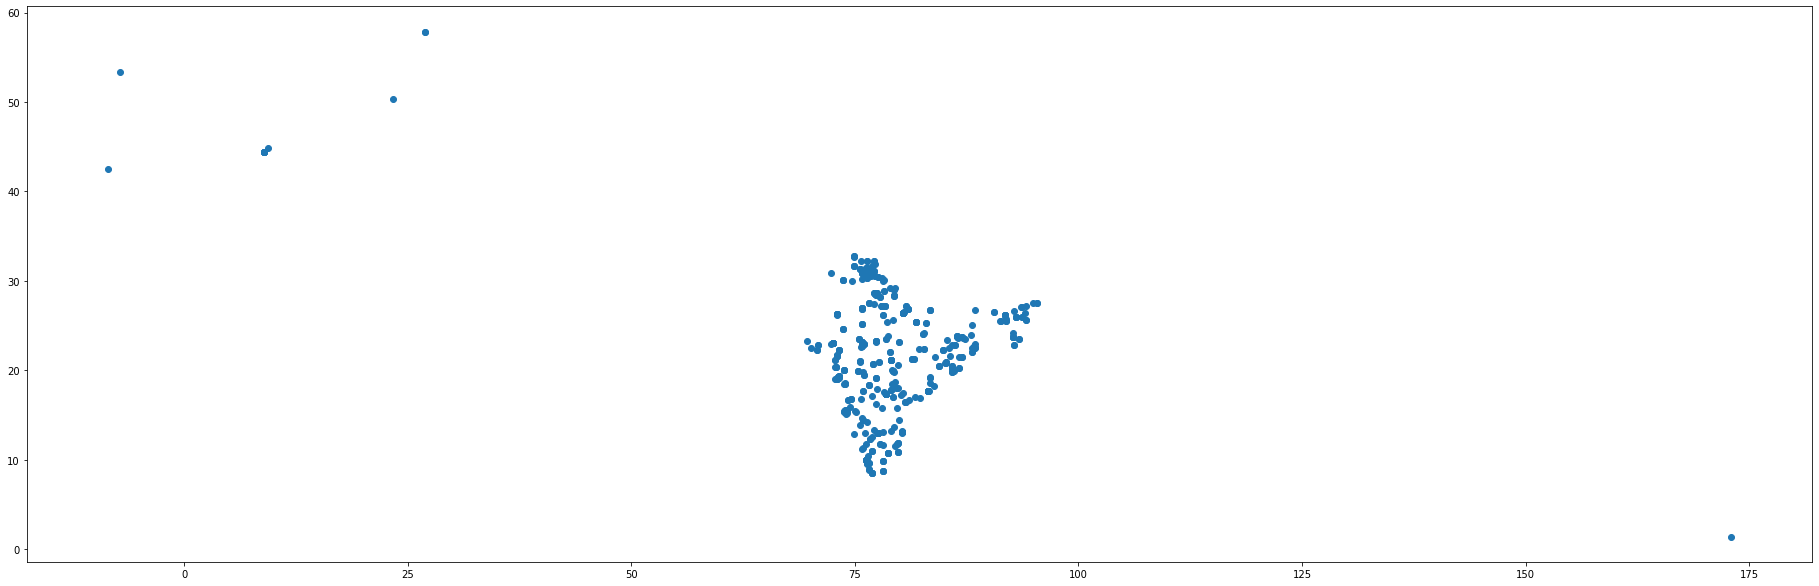

In [12]:
# pollution_geom.geometry.plot()
'''For reference purposes'''
from IPython.display import Image
Image(filename='all.png')

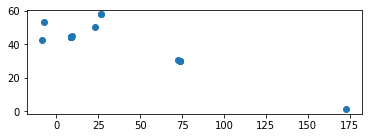

In [13]:
# india_administrative = gpd.read_file('IND_adm/IND_adm0.shp')
# india_administrative.plot()
# pollution_geom.crs = "epsg:4326"
# outside_india = pollution_geom.geometry.disjoint(india_administrative.geometry.iloc[0])
# pollution_geom[outside_india].plot()
'''For reference purposes'''
Image(filename='outliers.png')

### Dump latitude, longitude, errors and outliers to file for later use and manual correction

In [14]:
# with open('outliers.csv', 'w') as f:
#     f.write(outside_india.to_csv(header=['geometry']))
# with open('errors.txt', 'w') as f:
#     f.write(json.dumps(errors))
# with open('lat_data.txt', 'w') as f:
#     f.write(json.dumps(lat_dict))
# with open('long_data.txt', 'w') as f:
#     f.write(json.dumps(long_dict))

### Load latitude and longitude

In [9]:
with open('long_data.txt', 'r') as f:
    long_dict = json.loads(f.read())
with open('lat_data.txt', 'r') as f:
    lat_dict = json.loads(f.read())

### Construct sample GeoDataFrame for plot (to indicate existence of unique spatial datapoints)

In [10]:
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(long_dict.values(), lat_dict.values())]
pollution_geom = gpd.GeoDataFrame(geometry = geometry)

<AxesSubplot:>

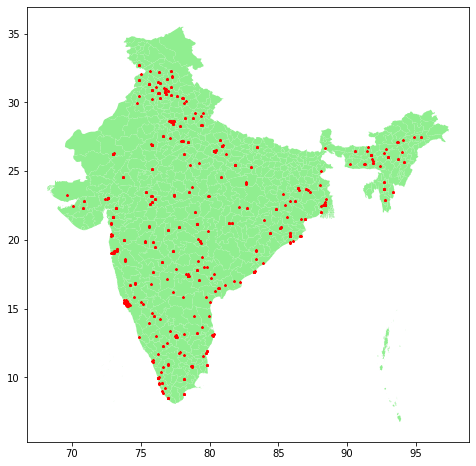

In [11]:
fig, ax = plt.subplots(1, figsize=(8,8))
base = india_districts.plot(ax=ax, color='lightgreen')
pollution_geom.plot(ax=base, color='red', markersize=5, marker='*')

## Merge latitude longitude & create geometry for plot (all datapoints)

In [15]:
aqi_data_copy = aqi_data.copy()
aqi_data_copy['latitude'] = aqi_data_copy['Location of Monitoring Station'].map(lat_dict)
aqi_data_copy['longitude'] = aqi_data_copy['Location of Monitoring Station'].map(long_dict)
aqi_data_copy.sample()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5,Unnamed: 11,latitude,longitude
38149,617,27-11-15,Kerala,Alappuzha,"DC Mills Pathirapally, Alappuzha",Kerala State Pollution Control Board,Industrial Area,2.0,5.0,61.0,NaN,NaN,9.595201,76.328327


In [16]:
pollution_geom_copy = gpd.GeoDataFrame(aqi_data_copy, geometry=gpd.points_from_xy(aqi_data_copy.longitude, aqi_data_copy.latitude))
pollution_geom_copy[pollution_geom_copy['Location of Monitoring Station'].isna() == False].sample()                                  

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5,Unnamed: 11,latitude,longitude,geometry
26890,554,30-06-15,Uttar Pradesh,Allahabad,Square crossing circle of Laxmi Talkies,Uttar Pradesh State Pollution Control Board,"Residential, Rural and other Areas",5.0,6.0,314.0,NaN,NaN,25.44894,81.83329,POINT (81.83329 25.44894)


### Check validity of geometry data of all rows

In [17]:
error_prone_points = pollution_geom_copy[pollution_geom_copy.geometry.is_valid == False]
error_prone_points[error_prone_points.columns.difference(['geometry'])]

,Agency,City/Town/Village/Area,Location of Monitoring Station,NO2,PM 2.5,RSPM/PM10,SO2,Sampling Date,State,Stn Code,Type of Location,Unnamed: 11,latitude,longitude
21663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Plot using complete geodataframe

<AxesSubplot:>

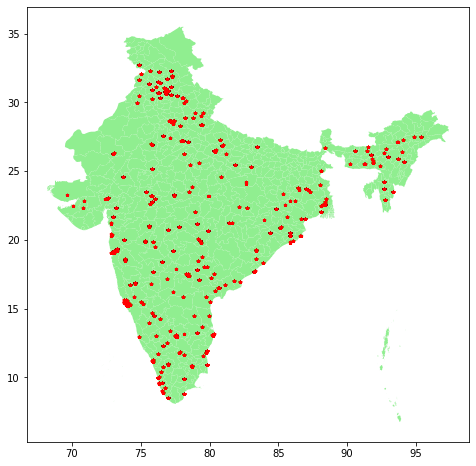

In [18]:
ig, ax = plt.subplots(1, figsize=(8,8))
base = india_districts.plot(ax=ax, color='lightgreen')
pollution_geom_copy[pollution_geom_copy.geometry.is_valid == True].plot(ax=base, color='red', marker='*', markersize=5)

In [19]:
aqi_data = pollution_geom_copy[pollution_geom_copy.geometry.is_valid == True].copy()

## Finding AQI

### Calculate SO<sub>2</sub> in AQI range

In [20]:
def calculate_so2_aqi_range(so2):
    if pd.isna(so2):
        return float("nan")
    if so2<=40:
     si= so2*(50/40)
    elif 40<so2<=80:
     si= 50+(so2-40)*(5/4)
    elif 80<so2<=380:
     si= 100+(so2-80)/3
    elif 380<so2<=800:
     si= 200+(so2-380)/8
    elif 800<so2<=1600:
     si= 300+(so2-800)/8
    elif so2>1600:
     si= 400+(so2-1600)/8
    return si
aqi_data['si']=aqi_data["SO2"].apply(calculate_so2_aqi_range)

### Calculate NO<sub>2</sub> in AQI range

In [21]:
def calculate_no2_aqi_range(no2):
    if pd.isna(no2):
        return float("nan")
    if no2<=40:
     ni= no2*5/4
    elif 40<no2<=80:
     ni= 50+(no2-40)*(5/4)
    elif 80<no2<=180:
     ni= 100+(no2-80)
    elif 180<no2<=280:
     ni= 200+(no2-180)
    elif 280<no2<=400:
     ni= 300+(no2-280)*(5/6)
    elif no2>400:
     ni= 400+(no2-400)*(5/6)
    return ni
aqi_data['ni']=aqi_data['NO2'].apply(calculate_no2_aqi_range)

### Calculate PM2.5 in AQI range

In [22]:
def calculate_PM2_5_aqi_range(pm2_5):
    if pd.isna(pm2_5):
        return float("nan")
    pm=pm2_5
    if pm<=30:
     pmi= pm*5/3
    elif 30<pm<=60:
     pmi= 50+(pm-30)*(5/3)
    elif 60<pm<=90:
     pmi= 100+(pm-60)*(10/3)
    elif 90<pm<=120:
     pmi= 200+(pm-90)*(10/30)
    elif 120<pm<=250:
     pmi= 300+(pm-120)*(10/13)
    elif pm>250:
     pmi= 400+(pm-250)*(10/13)
    return pmi
aqi_data['pmi2_5']=aqi_data['PM 2.5'].apply(calculate_PM2_5_aqi_range)

### Calculate PM10 in AQI range

In [23]:
def calculate_PM10_aqi_range(pm10):
    if pd.isna(pm10):
        return float("nan")
    pm=pm10
    if pm<=50:
     pmi= pm
    elif 50<pm<=100:
     pmi= pm
    elif 100<pm<=250:
     pmi= 100+(pm-100)*(2/5)
    elif 250<pm<=350:
     pmi= 200+(pm-250)
    elif 350<pm<=430:
     pmi= 300+(pm-350)*(5/4)
    elif pm>430:
     pmi= 400+(pm-430)*(5/4)
    return pmi
aqi_data['pmi10']=aqi_data['RSPM/PM10'].apply(calculate_PM10_aqi_range)

## Finally, calculate AQI and get categories

In [24]:
def calculate_AQI(si,ni,pmi2_5,pmi10):
    t=[]
    for x in (si,ni,pmi2_5,pmi10):
        if not pd.isna(x):
            t.append(x)
    try:
        a=max(t)
        return a
    except ValueError:
        return float("nan")
aqi_data["AQI"]=aqi_data.apply(lambda x:calculate_AQI(x['si'],x['ni'],x['pmi2_5'],x['pmi10']),axis=1)

In [25]:
def get_aqi_category(aqi):
    aqi_category="Unknown"
    if 0<=aqi<=50:
        aqi_category="Good"
    elif 50<aqi<=100:
        aqi_category="Satisfactory"
    elif 100<aqi<=200:
        aqi_category="Moderately polluted"
    elif 200<aqi<=300:
        aqi_category="Poor"
    elif 300<aqi<=400:
        aqi_category="Very poor"
    elif 400<aqi<=500:
        aqi_category="Severe"
    elif 500<aqi:
        aqi_category="Extremely Severe"
    return aqi_category
aqi_data["AQI_category"]=aqi_data["AQI"].apply(get_aqi_category)

### Plot of raw AQI data

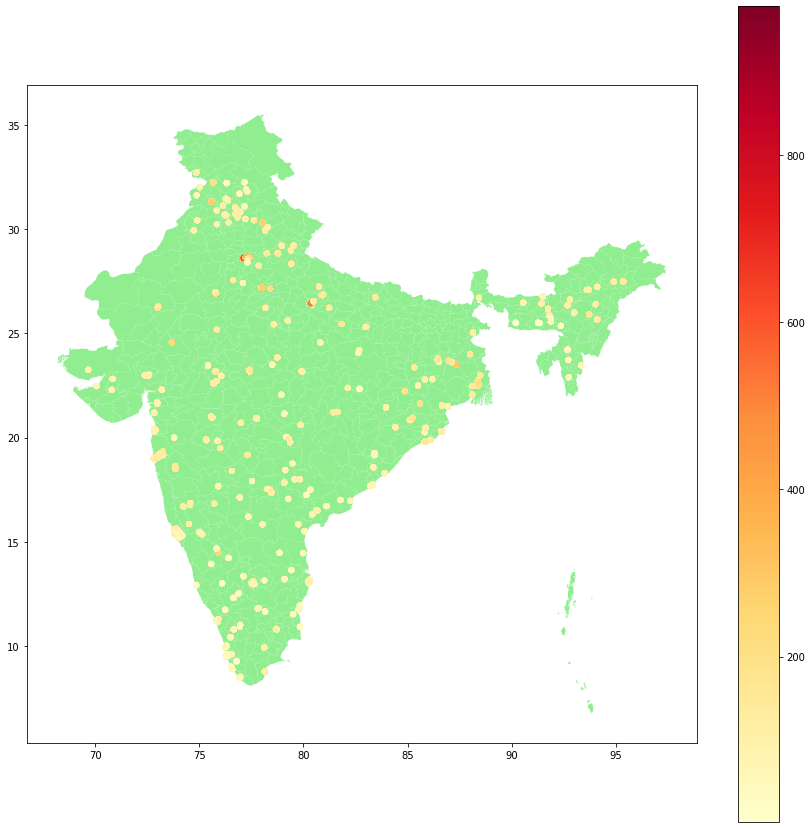

In [26]:
ig, ax = plt.subplots(1, figsize=(15,15))
base = india_districts.plot(ax=ax, color='lightgreen')
axx = aqi_data.plot(ax=base, column='AQI', cmap='YlOrRd', markersize=25, figsize=(15,15), legend=True)

### Count of other statistics w.r.t AQI Categories

In [27]:
aqi_data.groupby("AQI_category").describe()

SO2                                              \
                       count       mean        std   min  25%  50%   75%   
AQI_category                                                               
Extremely Severe        24.0   7.958333   6.436845  2.00  4.0  5.0  10.0   
Good                  9577.0   5.251406   4.324799  1.15  2.0  4.0   7.0   
Moderately polluted  17240.0  11.125176  10.261801  1.00  5.0  8.0  14.0   
Poor                  1492.0  10.010389  10.189686  1.00  4.0  7.0  12.0   
Satisfactory         19987.0   7.448685   5.532001  1.00  4.0  6.0  10.0   
Severe                  63.0   9.968254  13.340417  2.00  3.0  6.0  10.0   
Unknown                  0.0        NaN        NaN   NaN  NaN  NaN   NaN   
Very poor              339.0   8.348083  11.654408  2.00  4.0  5.0  10.0   

                                NO2             ...    pmi10              \
                       max    count       mean  ...      75%         max   
AQI_category                                    ...                        
Extremely Severe      28.0     24.0  60.416667  ...  619.375  977.500000   
Good                  40.0   9542.0  13.600679  ...   44.000   50.000000   
Moderately polluted  184.0  17459.0  30.134337  ...  128.000  160.000000   
Poor                 122.0   1519.0  40.109282  ...  247.000  299.666667   
Satisfactory          68.0  20367.0  20.803236  ...   86.000  100.000000   
Severe                84.0     65.0  55.500000  ...  438.750  498.750000   
Unknown                NaN      0.0        NaN  ...      NaN         NaN   
Very poor            153.0    348.0  50.738506  ...  340.000  400.000000   

                         AQI                                                 \
                       count        mean        std         min         25%   
AQI_category                                                                  
Extremely Severe        24.0  592.338408  98.726755  501.250000  523.125000   
Good                  9762.0   35.839675   9.698439    2.500000   29.000000   
Moderately polluted  17811.0  120.778613  16.778478  100.138487  107.600000   
Poor                  1526.0  230.451726  26.599365  200.333333  207.000000   
Satisfactory         20758.0   74.309897  13.974652   50.040000   62.000000   
Severe                  66.0  433.914627  23.814804  400.769231  416.250000   
Unknown                  0.0         NaN        NaN         NaN         NaN   
Very poor              351.0  334.372215  26.859937  300.769231  311.923077   

                                                         
                            50%         75%         max  
AQI_category                                             
Extremely Severe     583.750000  619.375000  977.500000  
Good                  37.000000   44.000000   50.000000  
Moderately polluted  116.800000  129.600000  200.000000  
Poor                 224.000000  247.000000  299.666667  
Satisfactory          74.000000   86.000000  100.000000  
Severe               430.000000  443.437500  498.750000  
Unknown                     NaN         NaN         NaN  
Very poor            326.923077  353.076923  400.000000  

[8 rows x 96 columns]

#### Find SO<sub>2</sub> mean value

In [28]:
so2_mean=aqi_data.groupby("State")["si"].mean()
so2_mean.head(6)

State
Andhra Pradesh             8.615847
Arunachal Pradesh          4.694444
Assam                      8.746892
Chandigarh                 2.500000
Chhattisgarh              12.261905
Dadra and Nagar Haveli    19.854651
Name: si, dtype: float64

#### Find NO<sub>2</sub> mean value

In [29]:
no2_mean=aqi_data.groupby("State")["ni"].mean()
no2_mean.head(6)

State
Andhra Pradesh            25.951182
Arunachal Pradesh          7.130682
Assam                     17.764560
Chandigarh                31.780619
Chhattisgarh              28.585466
Dadra and Nagar Haveli    33.633721
Name: ni, dtype: float64

#### Find PM10 mean value

In [30]:
pm10_mean=aqi_data.groupby("State")["pmi10"].mean()
pm10_mean.head(6)

State
Andhra Pradesh            71.917629
Arunachal Pradesh         77.315254
Assam                     85.342137
Chandigarh                80.795424
Chhattisgarh              97.479493
Dadra and Nagar Haveli    88.618605
Name: pmi10, dtype: float64

#### Find AQI mean value

In [31]:
aqi_mean=aqi_data.groupby("State")["AQI"].mean()
aqi_mean.head(6)

State
Andhra Pradesh            72.046214
Arunachal Pradesh         76.130833
Assam                     85.342137
Chandigarh                81.224764
Chhattisgarh              87.159636
Dadra and Nagar Haveli    88.618605
Name: AQI, dtype: float64

#### Find PM 2.5 mean value

In [32]:
pm2_5_mean = aqi_data.groupby("State")["pmi2_5"].mean()
pm2_5_mean = pm2_5_mean.fillna(value=aqi_data["pmi2_5"].mean())
pm2_5_mean.head(6)

State
Andhra Pradesh            75.659514
Arunachal Pradesh         75.659514
Assam                     75.659514
Chandigarh                75.659514
Chhattisgarh              75.659514
Dadra and Nagar Haveli    50.852713
Name: pmi2_5, dtype: float64

## Import NFHS data and clean

In [71]:
nfhs_data = pd.read_csv('NFHS_Data/NFHS-4_NFHS3_Factsheet-All_India_Indicators_R1.csv')
nfhs_data.sample()

,India/States/UTs,Survey,Area,Population and Household Profile - Population (female) age 6 years and above who ever attended school (%),Population and Household Profile - Population below age 15 years (%),Population and Household Profile - Sex ratio of the total population (females per 1000 males),Population and Household Profile - Sex ratio at birth for children born in the last five years (females per 1000 males),Population and Household Profile - Children under age 5 years whose birth was registered (%),Population and Household Profile - Households with electricity (%),Population and Household Profile - Households with an improved drinking-water source (%),...,Note of : Women's Empowerment and Gender Based Violence (age 15-49 years) - Ever-married women who have ever experienced spousal violence (%),Note of : Women's Empowerment and Gender Based Violence (age 15-49 years) - Ever-married women who have experienced violence during any pregnancy (%),Note of : Women's Empowerment and Gender Based Violence (age 15-49 years) - Women owning a house and/or land (alone or jointly with others) (%),Note of : Women's Empowerment and Gender Based Violence (age 15-49 years) - Women having a bank or savings account that they themselves use (%),Note of : Women's Empowerment and Gender Based Violence (age 15-49 years) - Women having a mobile phone that they themselves use (%),Note of : Women's Empowerment and Gender Based Violence (age 15-49 years) - Women age 15-24 years who use hygienic methods of protection during their menstrual period (%),Note of : Tobacco Use and Alcohol Consumption among Adults (age 15-49 years) - Men who use any kind of tobacco (%),Note of : Tobacco Use and Alcohol Consumption among Adults (age 15-49 years) - Men who consume alcohol (%),Note of : Tobacco Use and Alcohol Consumption among Adults (age 15-49 years) - Women who tried to stop smoking or using tobacco in any other form during the past 12 months (%),Note of : Tobacco Use and Alcohol Consumption among Adults (age 15-49 years) - Men who tried to stop smoking or using tobacco in any other form (during the past 12 months) %
59,Rajasthan,NFHS-3,Total,43.9,38.9,957.0,847.0,16.4,66.1,81.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
health = nfhs_data[
    [
        'India/States/UTs',
        'Survey',
        'Area',
        'Maternity Care (for last birth in the 5 years before the survey) - Mothers who consumed iron folic acid for 100 days or more when they were pregnant (%)',
        'Anaemia among Children and Adults15 - Children age 6-59 months who are anaemic (<11.0 g/dl) (%)',
        'Population and Household Profile - Households using improved sanitation facility (%)'
    ]
]
health.rename(columns={
    'India/States/UTs':'State',
    'Maternity Care (for last birth in the 5 years before the survey) - Mothers who consumed iron folic acid for 100 days or more when they were pregnant (%)':'MaternityCare',
    'Anaemia among Children and Adults15 - Children age 6-59 months who are anaemic (<11.0 g/dl) (%)':'Anaemia',
    'Population and Household Profile - Households using improved sanitation facility (%)':'Sanitation'}, inplace=True)
health.sample()

/home/adarshm26/envs/dwdm_assignment/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,State,Survey,Area,MaternityCare,Anaemia,Sanitation
78,Arunachal Pradesh,NFHS-4,Urban,11.1,49.7,73.3


In [73]:
health = health[(health["Survey"]=="NFHS-4") & (health["Area"]=="Total")]
health = health[1:].sort_values(by="State")
health.index = list(range(len(health)))
health.head(7)

,State,Survey,Area,MaternityCare,Anaemia,Sanitation
0,Andaman and Nicobar Islands,NFHS-4,Total,58.4,49.0,74.3
1,Andhra Pradesh,NFHS-4,Total,56.2,58.6,53.6
2,Arunachal Pradesh,NFHS-4,Total,8.3,50.7,61.3
3,Assam,NFHS-4,Total,32.0,35.7,47.7
4,Bihar,NFHS-4,Total,9.7,63.5,25.2
5,Chandigarh,NFHS-4,Total,44.9,73.1,82.9
6,Chattisgarh,NFHS-4,Total,30.3,41.6,32.7


### Import India States shapefile (for use in plots)

In [74]:
india_states = gpd.read_file('IND_adm/IND_adm1.shp')
india_states.sample()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
12,105,IND,India,13,Haryana,State,State,None,None,"POLYGON ((76.83715 30.87887, 76.85243 30.87069..."


In [75]:
india_states.iloc[34,4] = 'Uttarakhand'
india_states.iloc[14,4] = 'Jammu & Kashmir'
india_states.iloc[25,4] = 'Odisha'
health.iloc[6,0] = "Chhattisgarh"
india_states_geom = gpd.GeoDataFrame(pd.merge(health[health.columns.difference(['Survey','Area'])], india_states[['NAME_1','geometry']], how='left', left_on='State', right_on='NAME_1').drop(labels='NAME_1', axis=1))
india_states_geom.sample()

,Anaemia,MaternityCare,Sanitation,State,geometry
9,62.6,49.9,74.0,Delhi,"POLYGON ((77.32713 28.68516, 77.32539 28.68250..."


#### Plot showing percentage of mothers who consumed iron folic acid during pregnancy

<AxesSubplot:>

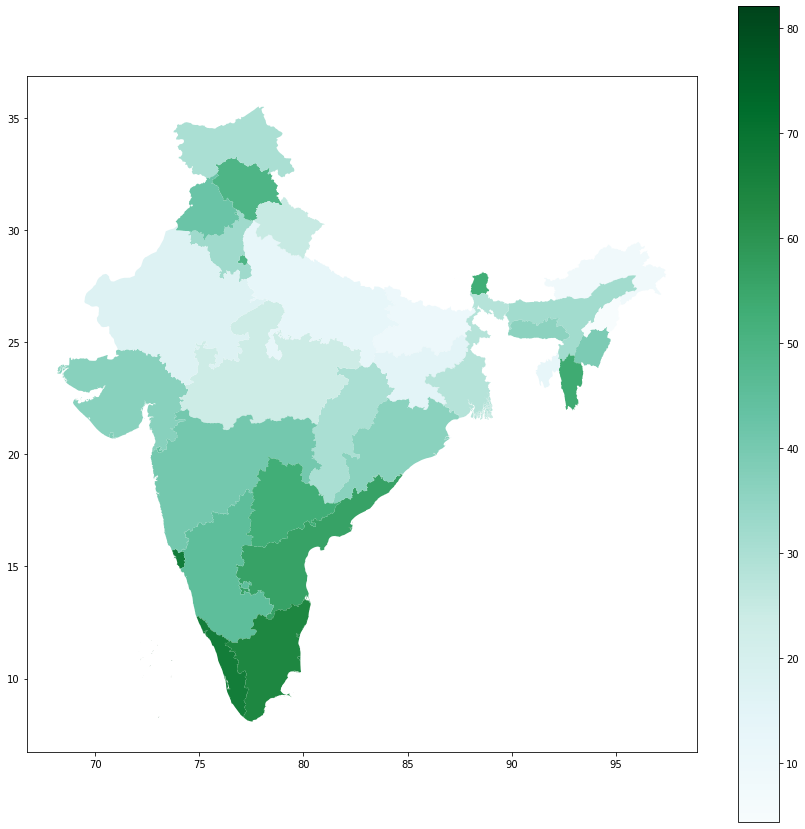

In [76]:
india_states_geom.plot(column='MaternityCare', cmap='BuGn', markersize=25, figsize=(15,15), legend=True)

#### Plot showing percentage of homes having good sanitation facility

<AxesSubplot:>

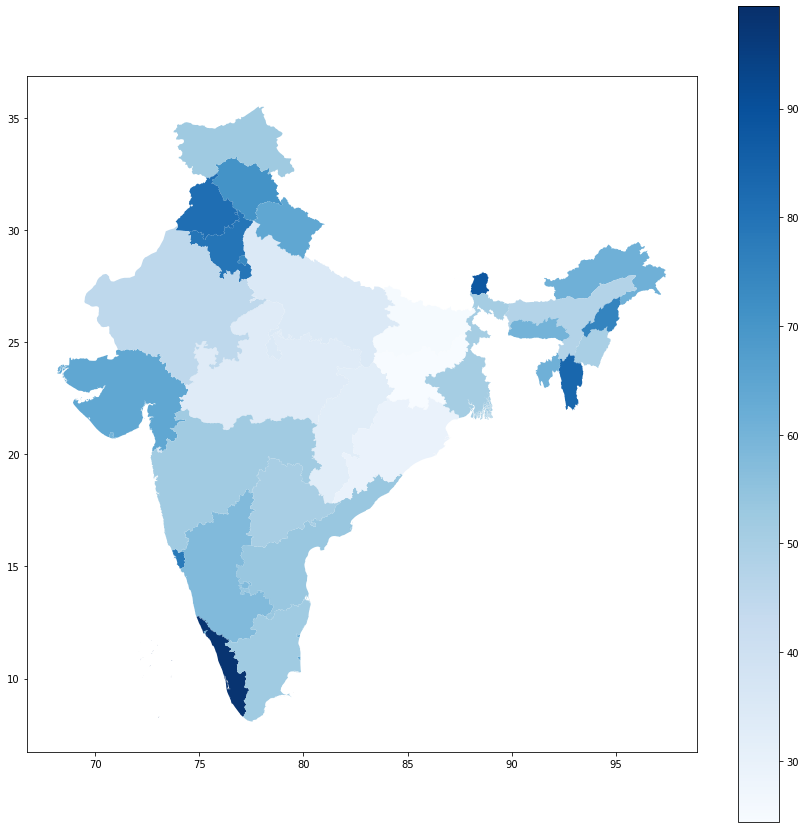

In [77]:
india_states_geom.plot(column='Sanitation', cmap='Blues', markersize=25, figsize=(15,15), legend=True)

#### Percentage of children(5-69 months) having anaemia

<AxesSubplot:>

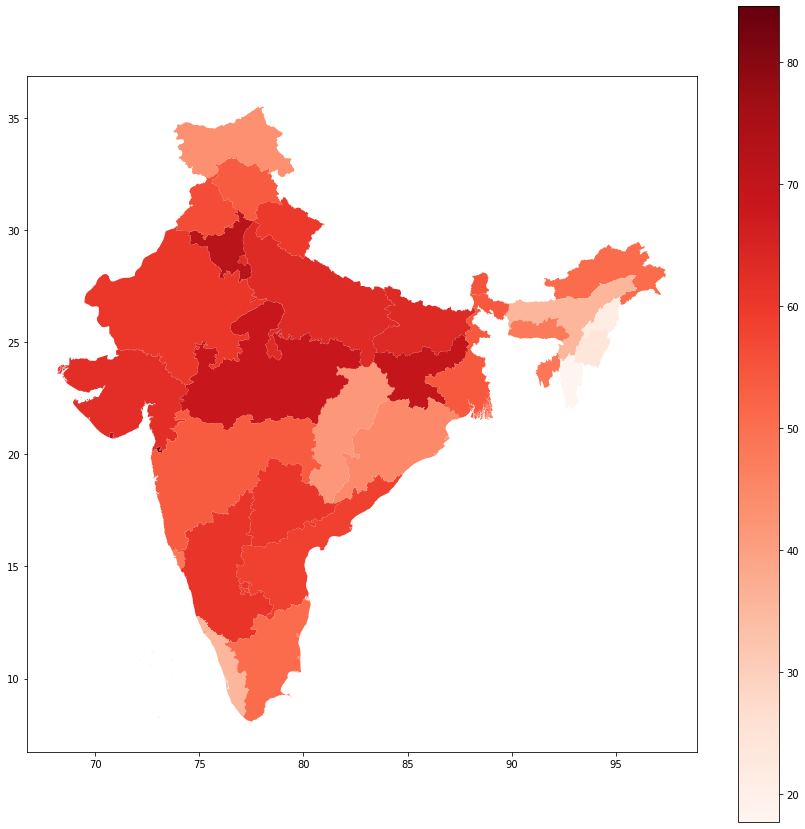

In [78]:
india_states_geom.plot(column='Anaemia', cmap='Reds', markersize=25, figsize=(15,15), legend=True)

In [79]:
health = health.merge(aqi_mean, on='State')
health = health.merge(so2_mean, on='State')
health = health.merge(no2_mean, on='State')
health = health.merge(pm2_5_mean, on='State')
health = health.merge(pm10_mean, on='State')
health = health[~health["AQI"].isna()]
health.index = list(range(len(health)))
health.sample()

,State,Survey,Area,MaternityCare,Anaemia,Sanitation,AQI,si,ni,pmi2_5,pmi10
27,Uttar Pradesh,NFHS-4,Total,12.9,63.2,35.0,139.980801,12.905633,34.533939,75.659514,140.199742


#### Plot showing mean AQI data

<AxesSubplot:>

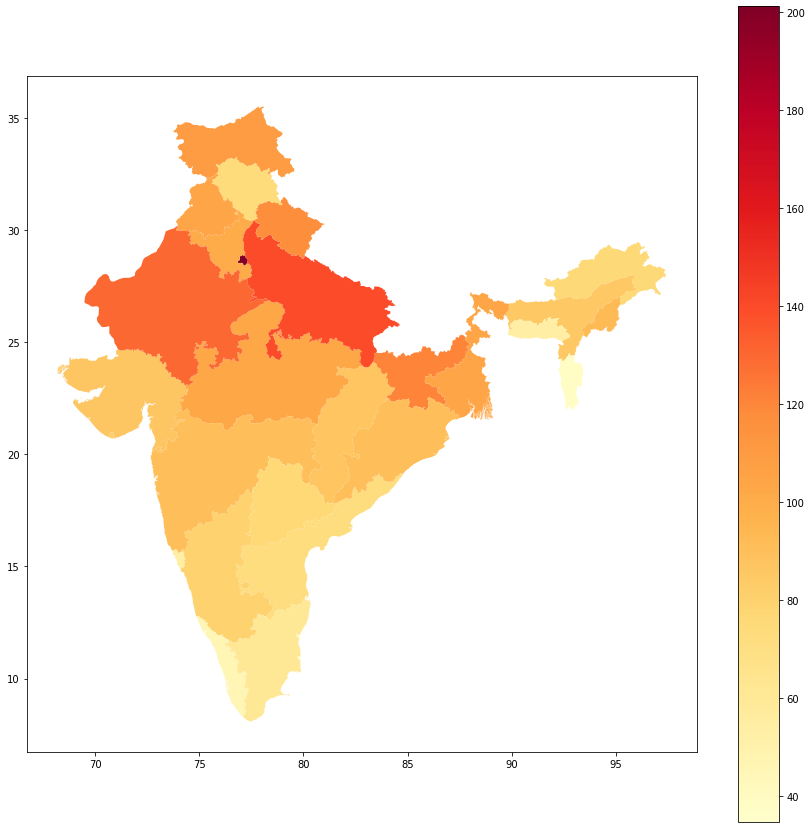

In [80]:
india_states_geom = india_states_geom.merge(health[['State','AQI','si','ni','pmi2_5','pmi10']], on='State')
india_states_geom.plot(column='AQI', cmap='YlOrRd', markersize=25, figsize=(15,15), legend=True)

#### X-Y Plot for AQI vs. Anaemia

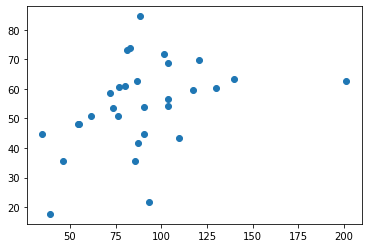

In [81]:
plt.scatter(
    health['AQI'], 
    health['Anaemia']
)

## Applying Linear Regression to predict <i>Anaemia</i> from <i>pollutants, maternity and sanitation data</i>

In [82]:
x = np.array(health[["ni","si","pmi2_5","pmi10",'AQI','MaternityCare','Sanitation']])

In [83]:
y = np.array(health['Anaemia'])

In [84]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(x, y)

print(f"Train Score : {100*regressor.score(x, y)}%")

Train Score : 47.75656122006502%


In [85]:
from sklearn.model_selection import train_test_split
from random import randrange as rrr
from sklearn.linear_model import LinearRegression 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1,random_state = 42) 

regressor = LinearRegression() 
regressor.fit(x_train, y_train)

print('Train Score: ', 100*regressor.score(x_train, y_train))  
print('Test Score: ', 100*regressor.score(x_test, y_test))

Train Score:  44.7428101454115
Test Score:  86.77381908072488


### Function to predict Anaemia percentage in children, given input values

In [86]:
def predict(s,n,p2,p10,sanitation,maternity):
    aqi=calculate_AQI(s,n,p2,p10)
    print(regressor.predict([(s,n,p2,p10,aqi,sanitation,maternity)]))
predict(8.61587,25.951182,75.659514,71.917629,53.6,56.2)

[56.45955054]


## Using ANN to predict geospatial information

In [ ]:
# from sklearn.neural_network import MLPRegressor
# classifier = MLPRegressor(max_iter=2000,
#                             solver='lbfgs', alpha=1e-5,
#                             hidden_layer_sizes=(5,2), 
#                             random_state=1)
# aqi_geo = aqi_data[~aqi_data['SO2'].isna()]
# print(len(aqi_geo))
# aqi_geo = aqi_geo[~aqi_geo['NO2'].isna()]
# print(len(aqi_geo))
# aqi_geo = aqi_geo[~aqi_geo['RSPM/PM10'].isna()]
# print(len(aqi_geo))
# clf_x = np.asarray(aqi_geo[['SO2','NO2','RSPM/PM10']], dtype=np.float64)
# clf_y = np.asarray(aqi_geo['latitude'], dtype=np.float64)
# for i in range(1,101):
#     clf_x_train, clf_x_test, clf_y_train, clf_y_test = train_test_split(clf_x, clf_y, test_size = 0.2,random_state = i) 
#     classifier.fit(clf_x_train, clf_y_train)
#     print(i)
#     print('Train Score: ', 100*classifier.score(clf_x_train, clf_y_train))  
#     print('Test Score: ', 100*classifier.score(clf_x_test, clf_y_test))
#     print()

### Finding state information from lat-long

In [ ]:
india_states = gpd.read_file('IND_adm/IND_adm1.shp')
india_states.sample()

In [ ]:
# state_info = aqi_data.copy()
# state_info['Found States'] = 'Unknown'
# def find_insides(coords):
#     x = Point(coords[1], coords[0])
#     for i in range(36):
#         if india_states.iloc[i,9].contains(x):
#             return india_states.iloc[i,4]
#     return 'Unknown'
# state_info['Found States'] = state_info[['latitude','longitude']].apply(find_insides, axis=1)
# state_info
# for i, row in india_states.iterrows():
#     state = row['NAME_1']
#     geom = row['geometry']
#     insides = state_info.geometry.disjoint(geom)
#     state_info[state_info['geometry'] in insides].loc[:,'Found States']